##### Python for High School (Winter 2022)

* [Table of Contents](PY4HS.ipynb)
* <a href="https://colab.research.google.com/github/4dsolutions/elite_school/blob/master/Py4HS_Matrix_Math.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>
* [![nbviewer](https://raw.githubusercontent.com/jupyter/design/master/logos/Badges/nbviewer_badge.svg)](https://nbviewer.org/github/4dsolutions/elite_school/blob/master/Py4HS_Matrix_Math.ipynb)

# Matrix Math

Let's start with notation, and with what we do in Markdown, with our Jupyter Notebooks.  

When wanting to typeset mathematics in Jupyter, we use $\LaTeX$.

Like this:

$$
\frac{d}{dx}\sin{x}=\cos{x}
$$

Or like this:

\begin{equation*}
\frac{1}{\Bigl(\sqrt{\phi \sqrt{5}}-\phi\Bigr) e^{\frac25 \pi}} =
1+\frac{e^{-2\pi}} {1+\frac{e^{-4\pi}} {1+\frac{e^{-6\pi}}
{1+\frac{e^{-8\pi}} {1+\ldots} } } }
\end{equation*}

A matrix is a notational device, an artifact in typesetting one could say, a rectangular arrangement that we generalize to more and more axes within the underlying theory (the algebra).  

$$
\boldsymbol{A} = \begin{bmatrix} 1 & -2 - i & 5 \\ 1 + i & i & 4-2i \end{bmatrix}
$$

A matrix is also an operational object, encoded in Python, versus typeset.

We might do matrix operations with the following packages: 

* [numpy.linalg](https://numpy.org/doc/stable/reference/routines.linalg.html#module-numpy.linalg)
* [scipy.linalg](https://docs.scipy.org/doc/scipy/reference/linalg.html#module-scipy.linalg) 

in Python.

In [1]:
import numpy as np
import scipy.linalg as sp_la

In [2]:
np.linalg

<module 'numpy.linalg' from '/Users/kirbyurner/opt/anaconda3/lib/python3.9/site-packages/numpy/linalg/__init__.py'>

In [3]:
sp_la

<module 'scipy.linalg' from '/Users/kirbyurner/opt/anaconda3/lib/python3.9/site-packages/scipy/linalg/__init__.py'>

Let's say we're especially keen to use the symbols from the quantum mechanics literature, such as the little dagger symbol next to a matrix.  [Where did that come from?](https://hsm.stackexchange.com/questions/11426/who-introduced-the-daggersymbol-as-conjugate-transpose-in-quantum-mechanics)

It represents ["cojugate transpose of"](https://en.wikipedia.org/wiki/Conjugate_transpose), meaning the matrix is transposed, then each term is replaced with its complex conjugate.

In [4]:
c = 1 + 2j
c

(1+2j)

In [5]:
c.conjugate()

(1-2j)

In [6]:
d = 3 - 5j

In [7]:
matrix = np.array([c, d, d, c]).reshape(2,2)
matrix

array([[1.+2.j, 3.-5.j],
       [3.-5.j, 1.+2.j]])

In [8]:
matrix.conjugate()

array([[1.-2.j, 3.+5.j],
       [3.+5.j, 1.-2.j]])

In [9]:
matrix.T.conjugate()

array([[1.-2.j, 3.+5.j],
       [3.+5.j, 1.-2.j]])

In [10]:
matrix.conjugate().T

array([[1.-2.j, 3.+5.j],
       [3.+5.j, 1.-2.j]])

From the [Wikipedia example](https://en.wikipedia.org/wiki/Conjugate_transpose#Example):

$$
\boldsymbol{A} = \begin{bmatrix} 1 & -2 - i & 5 \\ 1 + i & i & 4-2i \end{bmatrix}
$$

$$
\boldsymbol{A}^\mathsf{T} = \begin{bmatrix} 1 & 1 + i \\ -2 - i & i \\ 5 & 4-2i\end{bmatrix}
$$

$$
\boldsymbol{A}^\mathrm{H} = \begin{bmatrix} 1 & 1 - i \\ -2 + i & -i \\ 5 & 4+2i\end{bmatrix}
$$

In [11]:
A = np.array([[1, -2-1j, 5], [1+1j, 1j, 4-2j]], dtype=complex)
A

array([[ 1.+0.j, -2.-1.j,  5.+0.j],
       [ 1.+1.j,  0.+1.j,  4.-2.j]])

In [12]:
A.T

array([[ 1.+0.j,  1.+1.j],
       [-2.-1.j,  0.+1.j],
       [ 5.+0.j,  4.-2.j]])

In [13]:
A.T.conjugate()

array([[ 1.-0.j,  1.-1.j],
       [-2.+1.j,  0.-1.j],
       [ 5.-0.j,  4.+2.j]])

[Dr. Shouke Wei](https://medium.com/@shouke.wei) has done some excellent work online to distill $\LaTeX$'s abilities for us.  I'm not finding the dagger per se, but I've got what I need to make a matrix.

I'm drawing from his *Commonly Used Equations and Symbols with Latex in Jupyter Notebook* [on Medium](https://medium.com/@shouke.wei/commonly-used-equations-and-symbols-with-latex-in-jupyter-notebook-c5812ac15e90). If you have exhausted your quota on Medium, not to worry.  What you need is right here in this Notebook.

$$
\begin{bmatrix}
    x_{11} & x_{12} & x_{13} & \dots & x_{1n} \\
    x_{21} & x_{22} & x_{23} & \dots & x_{2n} \\
    \ldots &\ldots &\ldots &\ldots &\ldots \\
    x_{d1}       & x_{d2} & x_{d3} & \dots & x_{dn}
\end{bmatrix}
=
\begin{bmatrix}
    x_{11} & x_{12} & x_{13} & \dots  & x_{1n} \\
    x_{21} & x_{22} & x_{23} & \dots  & x_{2n} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    x_{d1} & x_{d2} & x_{d3} & \dots  & x_{dn}
\end{bmatrix}
$$

Adapting what we've learned above, let's go below:

$$
\begin{bmatrix}
    x_{11} & x_{12} & x_{13} & \dots & x_{1n} \\
    x_{21} & x_{22} & x_{23} & \dots & x_{2n} \\
    \ldots &\ldots &\ldots &\ldots &\ldots \\
    x_{d1}       & x_{d2} & x_{d3} & \dots & x_{dn}
\end{bmatrix}{\Large ^{\dagger}}
$$

That's pretty good right?  There's some playing with [font size](https://latex-tutorial.com/changing-font-size/).

And besides, we're usually fine representing an entire matrix with one letter, thusly:

$$
A^{\dagger}
$$

But what does it all mean:  the Hermitian adjoint and so on?

In [14]:
from IPython.display import YouTubeVideo

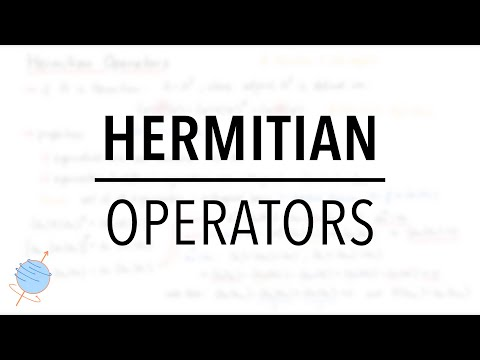

In [15]:
YouTubeVideo("t2z3Tinoi04")

We're going to need the eigen stuff, complex conjugates, the star operator...  more $\LaTeX$ and more operational objects, in other words.

$$
A^{\star}
$$

Is that the right star?

$$
A^{*}
$$

might be better.

### Note to Teachers

Our Notebooks are not meant to serve as a comprehensive recap of mathematics in general.  We're not engaged in the project of forming an encyclopedia.  Far from it.  The purpose of these Notebooks is more to demonstrate a methodolgy a teacher or student might adopt in order to give rise to (to float) a curriculum. 

A curriculum is a host of topics that hang together and mutually refer to one another, more like a mini-language or simple system.

This Matrix Math page is a case in point.  The Pauli Matricies usually appear in the context of particle physics aka quantum mechanics, which features groups, such as SU(2) and SU(3).  That context is mentioned in the embedded Youtubes, but this Notebook itself is silent about the physics of whatsons (e.g. electrons) but for here.

Many of our pages contain the word sandbox in their filenames, or otherwise remind that they're more like playgrounds, or one could say launch pads, or jumping off points, into wider studies.

An individual curriculum developer and/or team will crystallize only so much content.  For example Stephen Wolfram and his brother Conrad likewise advocate, through demonstration, span mathematics with Mathematica and its Wolfram Language, another set of landscapes in a different ecosystem, not featuring the Python language.  

For many students, a curriculum such as this one might serve as a stepping stone to the Wolfram universe. Tour in other lands, and return with baubles.  Take forth our Quadrays and Cabal of Polyhedrons to these other worlds, bring back skills and insights.

One way to approach a math is to let its jargon pile up for awhile, as you keep exercising the jargon to make sure you have it down.  

Spending too much time on one concept may actually be a pitfall, because it depends for its meaning on other concepts.  To delay reaching these other concepts is to make understanding even a first one all that more difficult.

For example, the idea of a complex conjugate, of a number or matrix, as distinct from its inverse or transpose, may not at first be clear.  

However, already, we know a matrix has an inverse and so on.  That could be the news right there.  Then we go back and add more flesh.

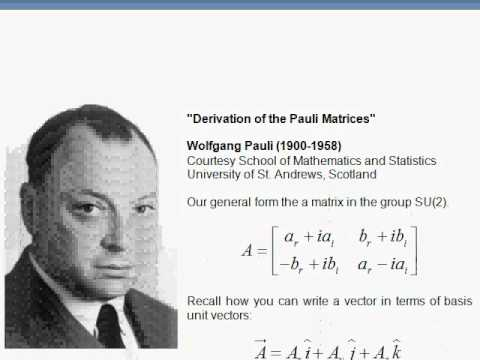

In [2]:
YouTubeVideo("yeK2N7FbkVI")

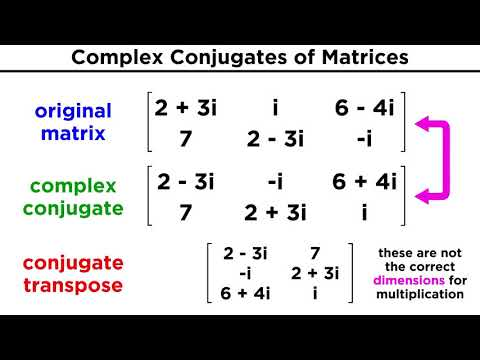

In [3]:
YouTubeVideo("DUuTx2nbizM")

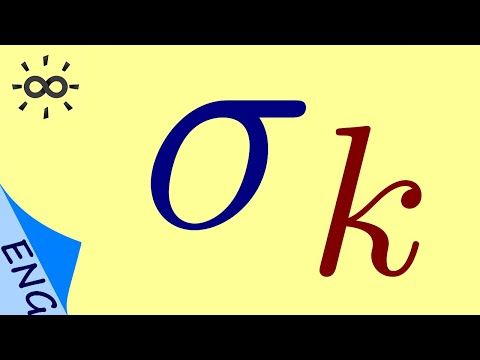

In [4]:
YouTubeVideo("7rE9gcj5I2U")

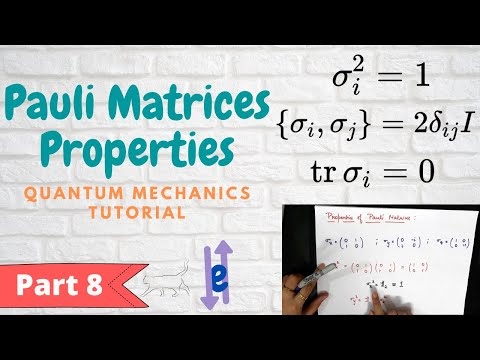

In [5]:
YouTubeVideo("ganF52dxL1U")

In [6]:
import sympy as sp
from sympy import Matrix

We're in the realm of $\mathbb{C}$.

* A Matrix is Hermitian if it equals its own conjugate transpose.
* A Matrix is Skew Hermitian if its negative equals its conjugate transpose
* A Matrix is Unitary if its inverse equals its conjugate transpose
* A Matrix is Special Unitary if it is unitary and has a determinant of 1.

In [7]:
σ0, σ1, σ2, σ3 = sp.symbols('σ0 σ1 σ2 σ3')

## Sandbox Area

In [8]:
sp.sqrt(-1)

I

In [9]:
sp.I

I

In [10]:
sp.I.conjugate()

-I

In [11]:
c = 3 + 2*sp.I; c

3 + 2*I

In [12]:
c.conjugate() # change the sign of the imaginary part

3 - 2*I

In [13]:
c * c.conjugate()

(3 - 2*I)*(3 + 2*I)

In [14]:
_.expand()

13

In [15]:
a, b = sp.symbols('a b')

Here are the four 2x2 Pauli matrices, including I itself as "sigma zero" (σ0).

In [16]:
σ0 = sp.eye(2)
σ0

Matrix([
[1, 0],
[0, 1]])

In [17]:
σ1 = Matrix([[0, 1], [1, 0]])
σ1

Matrix([
[0, 1],
[1, 0]])

In [18]:
σ2 = Matrix([[0, -sp.I], [sp.I, 0]])
σ2

Matrix([
[0, -I],
[I,  0]])

In [19]:
σ3 = Matrix([[1, 0], [0, -1]])
σ3

Matrix([
[1,  0],
[0, -1]])

That Pauli matrices self multiply to give an inverse is another way of saying they're self inverses.

$$
A A^{-1} = I
$$

$$
A = 1/A
$$

In [20]:
σ0 ** 2, σ1 ** 2, σ2 ** 2, σ3 ** 2

(Matrix([
 [1, 0],
 [0, 1]]),
 Matrix([
 [1, 0],
 [0, 1]]),
 Matrix([
 [1, 0],
 [0, 1]]),
 Matrix([
 [1, 0],
 [0, 1]]))

In [21]:
σ3 * σ2

Matrix([
[ 0, -I],
[-I,  0]])

In [22]:
σ2 * σ3

Matrix([
[0, I],
[I, 0]])

In [23]:
σ3 * σ2 - σ2 * σ3

Matrix([
[   0, -2*I],
[-2*I,    0]])

In [24]:
m = 2 * sp.I * σ1; m

Matrix([
[  0, 2*I],
[2*I,   0]])

In [25]:
m.conjugate()  # change the sign of any imaginary part

Matrix([
[   0, -2*I],
[-2*I,    0]])

In [26]:
m_h = m.conjugate().transpose()
m_h

Matrix([
[   0, -2*I],
[-2*I,    0]])


* Hermitian: $A^{\dagger} = A$
* Unitary:  $A^{\dagger} = A^{-1}$

In [27]:
m * m_h

Matrix([
[4, 0],
[0, 4]])

In [28]:
m.inv()

Matrix([
[   0, -I/2],
[-I/2,    0]])

In [29]:
m * m.inv()

Matrix([
[1, 0],
[0, 1]])

In [30]:
m.is_hermitian  # complex conjugate is also the inverse

False

In [31]:
σ3.is_hermitian

True

In [32]:
σ3 == σ3.conjugate().transpose()

True

In [33]:
σ2.is_hermitian

True

In [34]:
σ2.inv() == σ2.conjugate().transpose()

True

In [35]:
σ1.is_hermitian

True

In [36]:
σ1.inv()

Matrix([
[0, 1],
[1, 0]])

In [37]:
σ1.inv() * σ1

Matrix([
[1, 0],
[0, 1]])

In [38]:
σ1.conjugate().transpose()

Matrix([
[0, 1],
[1, 0]])

In [39]:
σ1.det()

-1

In [40]:
σ2.det()

-1

In [41]:
σ3.det()

-1